## [1]
次の関数
$$
f(x)=-3exp(-x)+exp(-3x)
$$
は $x=-1.0$ に $-1/2ln(3)=-0.5493061445$ を持つ．二分法によって数値解を求めよ.
繰り返しは１０回程度でいい．また，収束の様子を片対数グラフでプロットせよ．

x = -0.549306


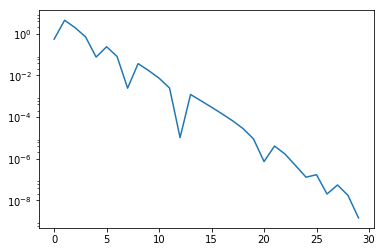

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return -3*np.exp(-x) + np.exp(-3*x)


EPS = 0.00000001
x_1 = -10
x_2 = 10

x = [i for i in range(30)]
y = []

for i in range(len(x)):
    
    x_s = (x_1 + x_2)/2
    y.append(abs(-0.5493061445 - x_s))
    if func(x_1)*func(x_s) < 0:
        x_2 = x_s
    else:
        x_1 = x_s
    if abs(func(x_s)) < EPS or abs(x_1 - x_2) < EPS:
        break

print("x = %f" % x_s)

plt.plot(x, y)
plt.yscale("log")
plt.show()


## [2] (Gauss-Seidelの収束性)
初期値を $[0,0,0]^t$ として，$\textbf{A}(tt)\textbf{x}=\textbf{b}$ にガウス・ザイデルによる連立一次方程式の反復解法プログラムを適用する．ただし，
$$
\textbf{A}(tt)= \left(
                    \begin{array}{ccc}
                      1 & tt & tt \\
                      tt & 1 & tt \\
                      tt & tt & 1
                    \end{array}
                \right),
\textbf{b}= \left(
                \begin{array}{c}
                  2 \\
                  2 \\
                  2
                \end{array}
            \right)
$$
である．$tt=0.2, 0.5, 0.9$ に対して有効数字６桁の解を得るための**反復回数**を求めよ．

In [3]:
#from decimal import *
#getcontext().prec = 6


def gauss_sidel(A, b, tol):
    """
    行列Aとベクトルb，交差(許し代)tolから収束解とその解を得るまでの反復回数を返す
    """
    x_pre = np.empty_like(b)
    error = 1e12
    
    L = np.tril(A)
    U = A - L
    L_inv = np.linalg.inv(L)
    
    counter = 0
    while error > tol: # 許容範囲になるまで
        x = np.dot(L_inv, b-np.dot(U, x_pre))
        error = np.linalg.norm(x-x_pre)/np.linalg.norm(x)
        x_pre = x
        counter += 1
    return x, counter

tt = [0.2, 0.5, 0.9]
b = np.array([2, 2, 2])

for i in range(3):
    t = tt[i]
    A =  np.array([[1, t, t],
                   [t, 1, t],
                   [t, t, 1]])
    x, counter = gauss_sidel(A, b, 1e-9)
    
    print("tt = {}".format(t))
    print("counter = {}".format(counter))
    print("x= {}".format(x))
    print("\n")
    

tt = 0.2
counter = 28
x= [ 1.42857143  1.42857143  1.42857143]


tt = 0.5
counter = 22
x= [ 1.  1.  1.]


tt = 0.9
counter = 123
x= [ 0.71428571  0.71428571  0.71428572]


